# Final Project: Great British Bake Off 👩‍🍳🍰🇬🇧



In [1]:
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

<a id='about_show'></a>
## About the Show 📺

The Great British Bake Off (known in the US as the Great British Baking Show) is a competition-style reality television show where amateur bakers participate in themed baking challenges. Each week's episode revolves around a theme; past themes include Bread Week, Cake Week, Vegan Week, and Italian Week. In each episode, the bakers are given three timed challenges based on the week's theme: the Signature Challenge, the Technical Challenge, and the Showstopper Challenge. 

In the Signature Challenge, the judges broadly specify what the bakers should make, and the bakers have freedom to use flavors, techniques, and recipes as they wish. The Signature Challenge earns its name because it's an opportunity for bakers to express themselves and their unique baking style to both the judges and the viewers at home. Many of the Signature Challenge bakes come from tried-and-tested recipes that contestants like to bake for their friends and families. For example, during Festivals Week in Season 10, the bakers were tasked with creating 24 buns themed around a world festival or holiday. Contestant Henry Bird made [these Chocolate Kardemummabullar](https://thegreatbritishbakeoff.co.uk/recipes/all/henry-chocolate-kardemummabullar/).

<img src="images/signature_bake.png" width="500" height="500">

In the Technical Challenge, bakers have no idea what they will be asked to create until the timer for the challenge starts. This means they can't prepare for it, and they have to rely on their baking knowledge and intuition. The Technical Challenge earns its name because it tests the bakers' technical knowledge of baking as a discipline.  Each Technical Challenge is posed by one particular judge, using a recipe from the judge's own personal collection. Bakers are provided with ingredients and a recipe, which is usually extremely basic, sometimes lacking ingredient measurements or containing single steps like "make a shortcrust pastry" with no further explanation. The finished products are judged blind and ranked from worst to best. An example of a Technical Challenge includes [judge Paul Hollywood's Baklava](https://thegreatbritishbakeoff.co.uk/recipes/all/paul-hollywood-baklava/). 

<img src="images/baklava.jpg" width="500" height="500">

The third challenge, the Showstopper, is similar to the Signature Challenge, in that bakers are given requirements ahead of time and have freedom to create their own recipes and prepare ahead of time. The main difference is that the Showstoppers are more challenging and larger-scale. The judges are looking for bakes that are breathtaking in both their appearance and their taste. For example, during Bread Week in Season 6, the bakers were asked to create a 3-D bread sculpture. Contestant Paul Jagger impressed the judges and millions of viewers with his *King of the Jungle* lion sculpture.

<img src="images/lion_bread_sculpture.png" width="500" height="500">

Each episode of the show features all three challenges. The contestants' bakes are tasted and assessed by two judges, and at the end of each episode, the hosts announce who will be eliminated from the competition and who will be recognized with a special award of "Star Baker" ⭐ (introduced in Season 2). Typically, one contestant is eliminated and one is crowned Star Baker ⭐, but on occasion there have been special cases in which zero or multiple people were eliminated or awarded Star Baker ⭐. 

The final episode of each season is held when there are just three bakers remaining. All three bakers compete in the final, and at the end, one winner is chosen and each of the others is considered a "runner-up". 


<a id='about_data'></a>
## About the Data 💾

For this project, we'll be using a few different datasets, which we've loaded in and saved in DataFrames called
- `baker_weeks`, 
- `challenge_results`,  
- `technical_challenge_recipes`, and
- `bakers`.

Note that while the Great British Bake Off has filmed fifteen seasons, our datasets do not include the most recent seasons. Since our datasets come from different [sources](#sources) and were compiled at different times, some of these datasets include more seasons than others. In addition, the number of bakers each season has varied, but all seasons have filmed one episode per week.
 
The `baker_weeks` DataFrame includes a breakdown of each baker's performance each week (that is, each episode), for the first eleven seasons of the show. Each row represents information **for one baker for one week**. This means that each baker will appear in the DataFrame multiple times. Bakers will continue to appear in the DataFrame even in weeks after they got eliminated, so these rows will have missing values (`NaN`).  
  
The `'Week Name'` column contains the theme of that week's episode. We also have the baker's name, gender (`'M'` and `'F'` are the only options), and age, the season number (also called the series number in other DataFrames), and the week number within that season. There are columns that indicate whether each baker was a Star Baker ⭐ that week, was eliminated that week, competed that week, or went on to win the season's competition 🥇. A few columns require more explanation about the show:
- `'Judge'` is either `'Mary'` or `'Prue'`. For the first seven seasons, the show's two judges were [Paul Hollywood](https://en.wikipedia.org/wiki/Paul_Hollywood) and [Mary Berry](https://en.wikipedia.org/wiki/Mary_Berry). After that, the show switched networks and Mary Berry was replaced by [Prue Leith](https://en.wikipedia.org/wiki/Prue_Leith). Since Paul Hollywood was a judge every season, the `'Judge'` column contains the name of the other judge.
- `'technical_rank'` contains a number reflecting each baker's ranking in the Technical Challenge (with 1 meaning 1st place, 2 meaning 2nd place, etc.)
-  `'Signature Handshake'` and `'Showstopper Handshake'` contain information on whether the contestant received a handshake 	🤝 from judge Paul Hollywood as he tasted their bake. Paul has a reputation for giving praise sparingly, and his so-called "[Hollywood Handshakes 🤝](https://hollywoodhandshakes.com/)" are considered a great honor. 
  


In [2]:
baker_weeks = bpd.read_csv('data/baker_weeks.csv')
baker_weeks

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,"Series 11, Episode 10",11,10,Prue,Final,Marc E,M,51,0,NaN,0,0,0,0,0
1252,"Series 11, Episode 10",11,10,Prue,Final,Mark L,M,32,0,NaN,0,0,0,0,0
1253,"Series 11, Episode 10",11,10,Prue,Final,Peter,M,20,0,2.0,0,1,0,1,1
1254,"Series 11, Episode 10",11,10,Prue,Final,Rowan,M,55,0,NaN,0,0,0,0,0


In [3]:
challenge_results = bpd.read_csv('data/challenge_results.csv')
challenge_results

,series,episode,baker,result,signature,technical,showstopper
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...,2.0,"Red, White & Blue Chocolate Cake with Cigarell..."
1,1,1,David,IN,Chocolate Orange Cake,3.0,Black Forest Floor Gateaux with Moulded Chocol...
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake,1.0,NaN
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake,NaN,NaN
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing,9.0,Three Tiered White and Dark Chocolate with Alm...
...,...,...,...,...,...,...,...
1131,10,10,Michael,NaN,NaN,NaN,NaN
1132,10,10,Michelle,NaN,NaN,NaN,NaN
1133,10,10,Phil,NaN,NaN,NaN,NaN
1134,10,10,Priya,NaN,NaN,NaN,NaN


The `technical_challenge_recipes` DataFrame contains information about each recipe that was given as a Technical Challenge in the first nine seasons. The columns specify the season (`'Ssn'`) and episode (`'Ep'`) that each recipe was baked in, which judge's recipe collection it came from (`'Whose'`), and several aspects of the recipe's complexity:
- number of components (`'Components'`), which are recipes used within the main recipe, such as a frosting or filling,
- number of ingredients (`'IngredCount'`),
- number of sentences in the instructions (`'RecipeSentences'`),
- number of dirty dishes produced (`'Dishes'`), and
- difficulty (`'DifficultyScore'`). 



In [4]:
technical_challenge_recipes = bpd.read_csv('data/technical_challenge_recipes.csv')
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


The `bakers` DataFrame contains a row for each baker from the first ten seasons, with detailed information about their results in the show, particularly about their performance in the Technical Challenge:
- `'technical_winner'`: number of times they won,
- `'technical_top3'`: number of times they placed in the top three,
- `'technical_bottom'`: number of times they placed last,
- `'technical_highest'`: highest (best) rank they ever earned,
- `'technical_lowest'`: lowest (worst) rank they ever earned, and
- `'technical_median'`: median of all ranks they ever earned.

It also includes information about when they appeared on the show and their demographics such as `'occupation'` and `'hometown'`.



In [5]:
bakers = bpd.read_csv('data/bakers.csv')
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,last_date_us,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,NaN,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,NaN,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,NaN,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,NaN,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,NaN,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,NaN,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,NaN,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,NaN,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,NaN,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F


<a id='section1'></a>
## Section 1: Exploratory Data Analysis 🔎

To start, we’ll perform some exploratory data analysis to get better acquainted with our data.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_1
points: 1
manual: true
-->

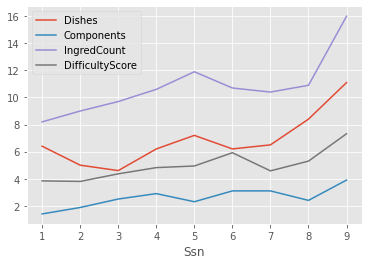

In [6]:
technical_challenge_recipes.groupby('Ssn').mean().plot(y=['Dishes', 'Components', 'IngredCount', 'DifficultyScore']);

In [7]:
challenge_results

,series,episode,baker,result,signature,technical,showstopper
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...,2.0,"Red, White & Blue Chocolate Cake with Cigarell..."
1,1,1,David,IN,Chocolate Orange Cake,3.0,Black Forest Floor Gateaux with Moulded Chocol...
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake,1.0,NaN
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake,NaN,NaN
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing,9.0,Three Tiered White and Dark Chocolate with Alm...
...,...,...,...,...,...,...,...
1131,10,10,Michael,NaN,NaN,NaN,NaN
1132,10,10,Michelle,NaN,NaN,NaN,NaN
1133,10,10,Phil,NaN,NaN,NaN,NaN
1134,10,10,Priya,NaN,NaN,NaN,NaN


In [8]:
def cal_max_length(name):
    if type(name) == str:
        return len(name)
    else:
        return 0

index_long_sign = challenge_results.get('signature').apply(cal_max_length).sort_values().index[-1]
index_long_show = challenge_results.get('showstopper').apply(cal_max_length).sort_values().index[-1]
index_long_show

41

In [9]:
longest_signature = challenge_results.get('signature').loc[index_long_sign]
print("Longest signature name: ", longest_signature, "\n")

longest_showstopper = challenge_results.get('showstopper').loc[index_long_show]
print("Longest showstopper name: ", longest_showstopper, "\n")

Longest signature name:  Beetroot Jelly on Poppy Seed Biscuits Spinach, Parmesan and Egg Tartlets Choux Buns with Goat's Cheese and Caramelised Onions 

Longest showstopper name:  Chocolate Pastry filled with Orange Cheesecake Chocolate Pastry filled with Milk Chocolate Ganache Strawberry Tart with Red Currant Glaze Cheesy Crab, Broad Bean and Tomato, Pancetta Risotto Canapés 



Notice that each of these recipes actually involves multiple items. Often the bakers have to make displays of baked goods with multiple components as part of a single challenge.

Another common sentiment among viewers is that the show favors younger people 👧🏽. To further explore the bakers' ages, let's convert the `'age'` column to a categorical variable:

In [11]:
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,last_date_us,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,NaN,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,NaN,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,NaN,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,NaN,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,NaN,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,NaN,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,NaN,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,NaN,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,NaN,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F


We add an additional column called `'age_category'` to the `bakers` DataFrame, based on the following age categorization:

| Age            | Category    |
| -------------- | ----------- |
| (0, 39]        | Young       |
| (39, 59]       | Middle-Aged |
| (59, $\infty$) | Elderly     |

In [12]:
def determine_age_cate(age):
    if age <= 39:
        return 'Young'
    elif age > 39 and age <= 59:
        return 'Middle-Aged'
    else: 
        return 'Elderly'

In [13]:
bakers = bakers.assign(age_category = bakers.get('age').apply(determine_age_cate))
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F,Young
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F,Young
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M,Middle-Aged
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


In [15]:
age_prop_df = bakers.groupby('age_category').count().get(['series'])

In [16]:
age_prop = age_prop_df.get('series')/bakers.shape[0]
age_prop

age_category
Elderly        0.100000
Middle-Aged    0.258333
Young          0.641667
Name: series, dtype: float64

We see that a majority of the participants are young!

Next, we'll investigate baker occupations. Do bakers on the show tend to hold certain types of jobs? Maybe they work in the food industry, do a lot of cooking at home, or have creative jobs like an artist 🎨 or photographer 📷. Some baking challenges even require significant feats of construction 🏗️, so maybe architects or engineers are popular.


In [18]:
popular_jobs_df = bakers.groupby('occupation').count().get(['series'])

In [19]:
popular_jobs = np.array(popular_jobs_df[popular_jobs_df.get('series') > 1].index)
popular_jobs 

array(['Banker', 'Full-time parent', 'Graphic Designer', 'Housewife',
       'Midwife', 'Nurse', 'PE teacher', 'Photographer', 'Retired',
       'Shop assistant', 'Student'], dtype=object)

<a id='section2'></a>
## Section 2: Popular Ingredients 🍊 🍫


Now, we'll try to answer some questions about popular ingredients used in bakers' recipes, and whether there's any connection between certain ingredients and a baker's success in the competition. Our data doesn't exactly include ingredient lists, but we do have recipe titles for the Signature and Showstopper Challenges in `challenge_results`, so we can look for common words there. We'll focus specifically on the Signature Challenge, as it's one in which bakers are able to be creative and showcase a recipe unique to them, and so they have complete freedom to use whatever ingredients they want. 


The DataFrame below contains all the rows of `challenge_results` with an entry in the `'signature'` column. We've also dropped the columns relating to the Technical and Showstopper Challenges, since we'll be focusing on the Signature Challenge here.

In [21]:
signatures = bpd.read_csv('data/signatures.csv')
signatures

,series,episode,baker,result,signature
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...
1,1,1,David,IN,Chocolate Orange Cake
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing
...,...,...,...,...,...
698,10,9,Rosie,OUT,"Lemon, Raspberry & Mint Domed Tarts"
699,10,9,Alice,STAR BAKER,"Mocha, Hazelnut & Orange Domed Tarts"
700,10,10,Alice,Runner-up,"Chocolate, Pear, Ginger and Maple Cake"
701,10,10,Steph,Runner-up,Black Forest Chocolate Cake


In [23]:
def clean_up_text(recipe):
    recipe = recipe.lower()
    '''Returns a lowercase version of recipe with certain special characters removed.'''
    for l in recipe:
        if l in ['(', ')', "'", '"', ';', ',']:
            recipe = recipe.replace(l, '')
    return recipe

signatures.get('signature').apply(clean_up_text)   

0      light jamaican black cake with strawberries an...
1                                  chocolate orange cake
2                       caramel cinnamon and banana cake
3         fresh mango and passion fruit hummingbird cake
4           carrot cake with lime and cream cheese icing
                             ...                        
698                   lemon raspberry & mint domed tarts
699                  mocha hazelnut & orange domed tarts
700                 chocolate pear ginger and maple cake
701                          black forest chocolate cake
702                    chocolate armagnac and prune cake
Name: signature, Length: 703, dtype: object

In [26]:
def split_recipe(recipe):
    return recipe.split(' ')
split_recipe("mint lilac & blackberry cake")

['mint', 'lilac', '&', 'blackberry', 'cake']

In [27]:
signatures = (signatures.assign(signature = signatures.get('signature').apply(clean_up_text), 
                                words = signatures.get('signature').apply(clean_up_text).apply(split_recipe)))
signatures

,series,episode,baker,result,signature,words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr..."
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]"
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir..."
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,..."
...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]"


In [30]:
all_words = []
for n in np.arange(signatures.shape[0]):
    all_words = all_words + signatures.get('words').iloc[n] 

In [31]:
# Just display the first ten words.
all_words[:10]

['light',
 'jamaican',
 'black',
 'cake',
 'with',
 'strawberries',
 'and',
 'cream',
 'chocolate',
 'orange']

In [33]:
def most_common(word_list):
    '''Returns a DataFramec with the ten most common words in word_list, in descending order.'''
    all_words_df = (bpd.DataFrame().assign(word = word_list, count = word_list).groupby('word').count()
                    .sort_values(by='count', ascending=False))
    return all_words_df.iloc[:10]

In [34]:
common_words_df = most_common(all_words)
common_words_df 

,count
word,
and,363
cake,116
&,75
chocolate,74
with,58
orange,51
ginger,44
lemon,43
pie,37


In [37]:
unique_words = baker_weeks.get('Week Name').str.lower().unique()
words_to_omit = []
for n in unique_words:
    uni_word = n.split(' ')
    words_to_omit = words_to_omit + uni_word
words_to_omit = list(np.unique(words_to_omit))

In [38]:
# Just display the first ten words.
words_to_omit[:10]

['1980s',
 'advanced',
 'alternative',
 'and',
 'batter',
 'biscuits',
 'botanical',
 'bread',
 'cake',
 'cakes']

In [43]:
def choose_words(list_word):
    meaningful_list = []
    for n in np.array(list_word):
        if n not in ['and', '&', 'with'] + words_to_omit:
            meaningful_list = np.append(meaningful_list, n)
    return meaningful_list

In [44]:
meaningful = signatures.assign(meaningful_words = signatures.get('words').apply(choose_words))
meaningful

,series,episode,baker,result,signature,words,meaningful_words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr...","[light, jamaican, black, strawberries, cream]"
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]",[orange]
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]","[cinnamon, banana]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir...","[fresh, mango, passion, fruit, hummingbird]"
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,...","[carrot, lime, cream, cheese, icing]"
...,...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]","[lemon, raspberry, mint, domed]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]","[mocha, hazelnut, orange, domed]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]","[pear, ginger, maple]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]","[black, forest]"


In [46]:
common_meaningful = []
for n in np.arange(meaningful.shape[0]):
    common_meaningful = np.append(common_meaningful, meaningful.get('meaningful_words').iloc[n])
common_meaningful

array(['light', 'jamaican', 'black', ..., 'forest', 'armagnac', 'prune'],
      dtype='<U32')

In [47]:
popular_words = most_common(list(common_meaningful))
popular_words

,count
word,
orange,51
ginger,44
lemon,43
apple,37
buns,29
almond,24
raspberry,24
loaf,23
walnut,23


The most common word should now be the name of a popular ingredient or flavor in British baking. Yum!

Now let's try to figure out which meaningful words were most popular in Signature Challenge recipe titles among bakers who were eliminated. These might be harder ingredients or flavors to get right, or ones that are less popular with the judges, and so we might caution future contestants about using these. ⚠️

In [49]:
signatures[(signatures.get('result')=='OUT') | (signatures.get('result')=='Runner-up')]

,series,episode,baker,result,signature,words
8,1,1,Lea,OUT,cranberry and pistachio cake with orange flowe...,"[cranberry, and, pistachio, cake, with, orange..."
9,1,1,Mark,OUT,sticky marmalade tea loaf,"[sticky, marmalade, tea, loaf]"
16,1,2,Annetha,OUT,rose petal shortbread,"[rose, petal, shortbread]"
17,1,2,Louise,OUT,stained glass window shortbread,"[stained, glass, window, shortbread]"
23,1,3,Jonathan,OUT,anchovy sweet paprika and oregano bread,"[anchovy, sweet, paprika, and, oregano, bread]"
...,...,...,...,...,...,...
689,10,7,Michael,OUT,figgy pudding hot cross buns,"[figgy, pudding, hot, cross, buns]"
694,10,8,Henry,OUT,crab tomato & new potato tarte tatin,"[crab, tomato, &, new, potato, tarte, tatin]"
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]"


In [50]:
out_bakers = signatures[(signatures.get('result')=='OUT') | (signatures.get('result')=='Runner-up')]
out_bakers_df = out_bakers.assign(meaningful = out_bakers.get('words').apply(choose_words))
out_common = []
for n in np.arange(out_bakers_df.shape[0]):
    out_common = np.append(out_common, out_bakers_df.get('meaningful').iloc[n])
out_common

array(['cranberry', 'pistachio', 'orange', 'flower', 'water', 'icing',
       'sticky', 'marmalade', 'tea', 'loaf', 'rose', 'petal',
       'shortbread', 'stained', 'glass', 'window', 'shortbread',
       'anchovy', 'paprika', 'oregano', 'pear', 'walnut', 'chicken',
       'mushroom', 'lemon', 'cupcake', 'mint', 'ginger', 'blackberry',
       'earl', 'grey', 'cupcakes', 'smoked', 'haddock', 'watercress',
       'quiche', 'courgette', 'caerphilly', 'cheese', 'thyme', 'loaf',
       'salt', 'peppercorn', 'loaf', 'stem', 'ginger', 'nuts', 'brown',
       'down', 'chicken', 'chicken', 'mushroom', 'baked', 'amaretto',
       'cheesecake', 'amaretto', 'mousse', 'banoffee', 'inspired',
       'mille', 'feuille', 'lemon', 'ginger', 'mille', 'feuille',
       'pineapple', 'passion', 'fruit', 'upside', 'down', 'fennel',
       'nigella', 'seed', 'naan', 'bannock', 'fig', 'walnut', 'pink',
       'peppercorn', 'tarte', 'tatin', 'black', 'forest', 'torte', 'lamb',
       'wellington', 'rosemary', 

In [51]:
common_out = most_common(list(out_common))
common_out

,count
word,
ginger,10
lemon,8
orange,8
buns,6
walnut,6
loaf,5
cheese,5
mushroom,4
pies,4


Now let's look at the meaningful words that were most popular in Signature Challenge recipe titles among bakers who didn't get eliminated. What special ingredients are they using? These might be more well-loved flavors and ingredients, and we might consider them safe choices for baking foods that the judges will enjoy! 😋


In [53]:
signatures[(signatures.get('result')=='IN') | (signatures.get('result')=='STAR BAKER') | (signatures.get('result')=='WINNER')]

,series,episode,baker,result,signature,words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr..."
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]"
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir..."
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,..."
...,...,...,...,...,...,...
695,10,8,Steph,STAR BAKER,caramelised onion & goats cheese tarte tatin,"[caramelised, onion, &, goats, cheese, tarte, ..."
696,10,9,David,IN,aperitif domed tarts,"[aperitif, domed, tarts]"
697,10,9,Steph,IN,raspberry lemon & white chocolate domed tarts,"[raspberry, lemon, &, white, chocolate, domed,..."
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]"


In [54]:
in_bakers = signatures[(signatures.get('result')=='IN') | (signatures.get('result')=='STAR BAKER') | (signatures.get('result')=='WINNER')]
in_bakers_df = in_bakers.assign(meaningful = in_bakers.get('words').apply(choose_words))
in_common = []
for n in np.arange(in_bakers_df.shape[0]):
    in_common = np.append(in_common, in_bakers_df.get('meaningful').iloc[n])
in_common

array(['light', 'jamaican', 'black', ..., 'domed', 'armagnac', 'prune'],
      dtype='<U32')

In [55]:
common_in = most_common(list(in_common))
common_in

,count
word,
orange,43
lemon,35
ginger,34
apple,33
almond,24
buns,23
raspberry,20
puddings,19
rhubarb,18


We notice that some ingredients are common among people who get eliminated and people who stayed, and that's just because they're common recipe ingredients generally. 

<a id='section3'></a>
## Section 3: Gender Balance 👩⚖️🧑🏼
After watching a couple of episodes, we start to wonder if more female bakers than male bakers have been selected to participate in the Great British Bake Off. Let's check if this is the case.

In [59]:
female_male = baker_weeks.groupby(['Season', 'Baker', 'Gender']).count().reset_index().groupby('Gender').count()
female_male

,Season,Baker,Episode,Week Number,Judge,Week Name,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
Gender,,,,,,,,,,,,,,
F,68,68,68,68,68,68,68,68,68,68,68,68,68,68
M,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [60]:
baker_count = female_male.get('Baker').iloc[0] + female_male.get('Baker').iloc[1]
observed_female_prop = female_male.get('Baker').iloc[0] / baker_count
observed_male_prop = female_male.get('Baker').iloc[1] / baker_count

print("Female Proportions: " + str(observed_female_prop))
print("Male Proprotions: " + str(observed_male_prop))
print("Number of Bakers: " + str(baker_count))

Female Proportions: 0.5151515151515151
Male Proprotions: 0.48484848484848486
Number of Bakers: 132


We recognize that `observed_female_prop` and `observed_male_prop` are similar but they're not exactly the same. Is this just random chance at play, or are female bakers actually more likely to be on the show? Let's do a hypothesis test with the following hypotheses:

- **Null Hypothesis**: Bakers on the show are drawn randomly from a population that’s 50% female and 50% male. 
- **Alternative Hypothesis**: Bakers on the show are not drawn randomly from a population that’s 50% female and 50% male.


In [62]:
null_distribution = np.array([0.5, 0.5])
null_distribution

array([0.5, 0.5])

For this hypothesis test, we'll use as our test statistic the absolute difference between the observed proportion of female bakers and 0.5, the expected proportion under the assumptions of the null hypothesis. Set the variable `observed_gender_stat` to the observed value of this statistic.

In [65]:
observed_gender_stat = observed_female_prop - 0.5
observed_gender_stat

0.015151515151515138

We write a simulation that runs 10,000 times, each time drawing a random sample of size `baker_count` from the null distribution. 

In [67]:
gender_stats = np.array([])
for n in np.arange(10000):
    gender_stats = np.append(gender_stats, abs(np.random.multinomial(baker_count, [0.5, 0.5])[0]/baker_count - 0.5))
gender_stats

array([0.02272727, 0.03030303, 0.06818182, ..., 0.02272727, 0.01515152,
       0.01515152])

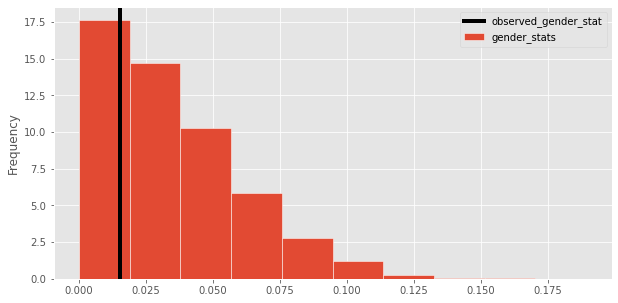

In [68]:
# Visualize with a histogram
bpd.DataFrame().assign(gender_stats=gender_stats).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_gender_stat, color='black', linewidth=4, label='observed_gender_stat')
plt.legend();

In [70]:
gender_p_value = sum(gender_stats >= observed_gender_stat)/10000
gender_p_value

0.7945

We find that the p-value is nowhere near the standard cutoff of 0.05 for statistical significance. So in this case, we fail to reject the null. 

It's important to note that even though we fail to reject the null, we’re not saying that bakers *were* necessarily drawn randomly from a population that’s 50% female and 50% male. In fact, nothing is random about how people get to be on the show. 

There are a lot of rules about who can apply to be on the show, and applicants are thoroughly vetted through an extensive [application process](https://gbbo.take-part.co.uk/info/rules) that involves an interview and a background check to ensure that none of the bakers have any sort of professional training or are friends or relatives of the judges. Simply put, bakers on the show are not selected via a purely random process.

When we say we fail to reject the null, this means that the bakers *could have* been drawn from a model that's 50% female and 50% male, but it doesn't mean they *were*.


<a id='section4'></a>
## Section 4. Well-Deserved? 🥇

In this section, we will use permutation testing to decide if different groups of bakers have similar technical abilities, as measured by their rankings in the Technical Challenges. Let's start by looking at our `baker_weeks` DataFrame which has a row for each baker for each week of the show, including for the remainder of the season after they've been eliminated. Let's start by only keeping the data for the bakers that actually competed in each week's episode. Since ten bakers participated in the first episode of Season 1, we'll look at the first ten rows of the resulting `competed` DataFrame. 

In [74]:
competed = baker_weeks[baker_weeks.get('Competed') == 1]
competed.take(np.arange(20))

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,"Series 1, Episode 2",1,2,Mary,Biscuits,Louise,F,44,0,4.0,0,0,1,1,0
18,"Series 1, Episode 2",1,2,Mary,Biscuits,Miranda,F,37,0,3.0,0,0,0,1,0
19,"Series 1, Episode 2",1,2,Mary,Biscuits,Ruth,F,31,0,5.0,0,0,0,1,0
21,"Series 1, Episode 3",1,3,Mary,Bread,David,M,31,0,4.0,0,0,0,1,0


In the `'Technical Rank'` column, contestants are given a ranking for how well they performed in the Technical Challenge, with 1 being the best. Notice in the first ten rows of `competed` shown above, some of the middle rankings are missing. In this episode, the judges didn't reveal everyone's rank and instead just pointed out the top three and bottom three contestants. For reasons like this, our dataset has just a few missing values, which we will ignore for this section. 

If we want to get a sense of how skilled a baker is, the technical rank is helpful, but needs to be taken in the context of the number of contestants still in the competition. For example, ranking 3rd place in the first week when there are many contestants is a lot more impressive than ranking 3rd place in the final week, when there are just three bakers remaining. To address this problem, we'll convert these rankings into *percentiles* to measure skill relative to the number of contestants remaining. 

For example, if there are four contestants remaining, a technical ranking of:
- 4 corresponds to the 25th percentile
- 3 corresponds to the 50th percentile
- 2 corresponds to the 75th percentile
- 1 corresponds to the 100th percentile

In [76]:
def cal_baker_week(episode):
    return competed.groupby(['Episode']).count().get('Season').loc[episode]

In [77]:
perc = competed.assign(Contestants=competed.get('Episode').apply(cal_baker_week))
perc = perc.assign(Percentile = np.round((1 - (perc.get('Technical Rank') - 1) / perc.get('Contestants')) * 100, 1))
perc

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10,90.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10,80.0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1,10,100.0
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0,10,NaN
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0,10,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Laura,F,31,0,4.0,0,0,0,1,0,4,25.0
1241,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Peter,M,20,0,1.0,0,1,0,1,1,4,100.0
1244,"Series 11, Episode 10",11,10,Prue,Final,Dave,M,30,0,1.0,0,0,1,1,0,3,100.0
1246,"Series 11, Episode 10",11,10,Prue,Final,Laura,F,31,0,3.0,0,0,1,1,0,3,33.3


Now we are ready to compare two groups of bakers to see if they are comparably skilled. Let's start with comparing the winners to the non-winners. We'll conduct a permutation test with the following hypotheses.

- **Null Hypothesis** : The `'Percentile'` data for winners comes from the same distribution as the `'Percentile'` data for non-winners. In other words, winners and non-winners perform equally well in Technical Challenges.
- **Alternate Hypothesis** : The `'Percentile'` data for winners and the `'Percentile'` data for non-winners come from different distributions. Winners perform better in Technical Challenges than non-winners.

As usual, we'll use the difference in group means as our test statistic. Here, we'll compute that as the mean for the winners minus the mean for the non-winners.

In [79]:
winner_avg = perc[perc.get('Winner')==1].get('Percentile').mean()
loser_avg = perc[perc.get('Winner')==0].get('Percentile').mean()

In [80]:
observed = winner_avg - loser_avg
observed

12.451918030370045

Create 1000 simulated values of the test statistic under the assumptions of the null hypothesis, and save simulated test statistics in the array `simulated_stats`.  Then create an appropriate visualization showing the distribution of the values in `simulated_stats` array.

In [82]:
simulated_stats = np.array([])
for n in np.arange(1000):
    shuffled_series = np.random.permutation(perc.get('Percentile'))
    
    shuffled_perc = perc.assign(shuffled = shuffled_series)
    
    one_test_stat = (shuffled_perc[shuffled_perc.get('Winner')==1].get('shuffled').mean() - 
                     shuffled_perc[shuffled_perc.get('Winner')==0].get('shuffled').mean())
    simulated_stats = np.append(simulated_stats, one_test_stat)
simulated_stats

array([-1.09854012e+00, -4.54394812e+00, -3.59481203e+00, -4.63964175e+00,
       -5.61962804e+00, -1.94100187e+00,  1.88777243e+00,  4.84969002e-02,
        3.81575330e-01, -1.06064306e+00,  2.95911986e+00,  2.17839806e-01,
       -1.37465639e+00, -1.65102167e+00, -3.85262716e+00, -3.89084476e-01,
       -5.02783873e+00,  7.30419528e-01, -1.76156568e+00,  2.26369748e+00,
        4.37375494e-01, -2.14969040e+00,  1.76348527e+00,  4.73781807e+00,
        1.86080243e+00, -8.34104866e-01, -4.38783058e+00, -4.96674465e+00,
       -9.89990057e-01,  3.01452750e+00, -3.84697332e+00, -2.81575536e+00,
        2.18514093e+00, -9.88391567e-01, -1.43597301e+00,  3.61745540e-01,
       -1.13559220e-01,  2.78310195e+00,  6.43411394e+00,  3.80339101e+00,
       -3.90811405e+00,  5.74095952e-01,  6.75963143e+00, -3.43311219e+00,
        2.91274710e+00, -1.71517557e-01,  3.36506561e+00,  1.45258510e+00,
       -1.40032534e+00,  2.21967482e+00, -4.29701902e+00,  2.52061071e+00,
        4.42911838e+00,  

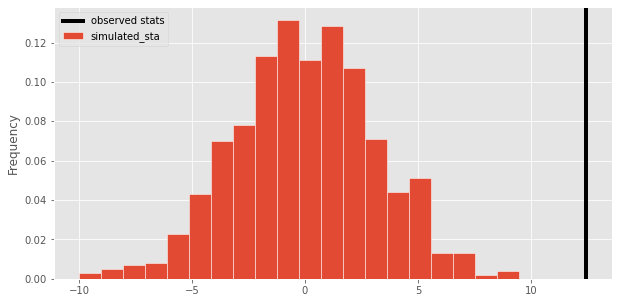

In [83]:

(bpd.DataFrame()
 .assign(simulated_sta=simulated_stats)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(observed, color='black', linewidth=4, label='observed stats')
plt.legend();



Now, we'll do a similar permutation test, but this time comparing the Technical Challenge `'Percentile'` of contestants who received a coveted handshake 🤝 from Paul Hollywood at least once to those who never did.



In [87]:
handshake_df = competed.groupby(['Season', 'Baker']).sum()
earned = handshake_df[(handshake_df.get('Signature Handshake') > 0) | 
             (handshake_df.get('Showstopper Handshake') > 0)].assign(Handshake = np.ones((27,), dtype=int))
earned

Week Number  Age  Signature Handshake  Technical Rank  \
Season Baker                                                            
3      Ryan              28  266                    1            45.0   
4      Frances           55  310                    1            36.0   
5      Luis              55  420                    1            33.0   
       Norman            15  330                    1            38.0   
6      Nadiya            55  300                    1            50.0   
...                     ...  ...                  ...             ...   
10     David             55  360                    1            32.0   
       Henry             36  160                    0            26.0   
       Michael           28  182                    1            47.0   
       Steph             55  280                    0            38.0   
11     Lottie            28  217                    1            37.0   

                Showstopper Handshake  Star Baker  Eliminated  Competed  \
Season Baker                                                              
3      Ryan                         0           1           1         7   
4      Frances                      0           2           0        10   
5      Luis                         0           1           1        10   
       Norman                       0           0           1         5   
6      Nadiya                       0           4           0        10   
...                               ...         ...         ...       ...   
10     David                        0           1           0        10   
       Henry                        1           1           1         8   
       Michael                      0           1           1         7   
       Steph                        1           4           1        10   
11     Lottie                       0           1           1         7   

                Winner  Handshake  
Season Baker                       
3      Ryan          0          1  
4      Frances      10          1  
5      Luis          0          1  
       Norman        0          1  
6      Nadiya       10          1  
...                ...        ...  
10     David        10          1  
       Henry         0          1  
       Michael       0          1  
       Steph         0          1  
11     Lottie        0          1  

[27 rows x 10 columns]

In [89]:
not_earned = handshake_df[(handshake_df.get('Signature Handshake') == 0) & 
             (handshake_df.get('Showstopper Handshake') == 0)].assign(Handshake = np.zeros((105,), dtype=int))
not_earned

Week Number  Age  Signature Handshake  Technical Rank  \
Season Baker                                                              
1      Annetha              3   60                    0             9.0   
       David               10  124                    0            20.0   
       Edd                 21  144                    0            13.0   
       Jasminder           15  225                    0            13.0   
       Jonathan             6   75                    0            16.0   
...                       ...  ...                  ...             ...   
11     Marc E              36  408                    0            46.0   
       Mark L              21  192                    0            23.0   
       Peter               55  200                    0            31.0   
       Rowan                6  165                    0            24.0   
       Sura                10  124                    0            21.0   

                  Showstopper Handshake  Star Baker  Eliminated  Competed  \
Season Baker                                                                
1      Annetha                        0           0           1         2   
       David                          0           0           1         4   
       Edd                            0           0           0         6   
       Jasminder                      0           0           1         5   
       Jonathan                       0           0           1         3   
...                                 ...         ...         ...       ...   
11     Marc E                         0           1           1         8   
       Mark L                         0           1           1         6   
       Peter                          0           3           0        10   
       Rowan                          0           0           1         3   
       Sura                           0           0           1         4   

                  Winner  Handshake  
Season Baker                         
1      Annetha         0          0  
       David           0          0  
       Edd             6          0  
       Jasminder       0          0  
       Jonathan        0          0  
...                  ...        ...  
11     Marc E          0          0  
       Mark L          0          0  
       Peter          10          0  
       Rowan           0          0  
       Sura            0          0  

[105 rows x 10 columns]

Our `earned` and `not_earned` DataFrames contain the information we need to determine who falls into which group for our permutation test, but we need to combine this data with the Technical Challenge percentiles in `perc`. 


In [91]:
shakes = earned.append(not_earned)
shakes

Week Number  Age  Signature Handshake  Technical Rank  \
Season Baker                                                            
3      Ryan              28  266                    1            45.0   
4      Frances           55  310                    1            36.0   
5      Luis              55  420                    1            33.0   
       Norman            15  330                    1            38.0   
6      Nadiya            55  300                    1            50.0   
...                     ...  ...                  ...             ...   
11     Marc E            36  408                    0            46.0   
       Mark L            21  192                    0            23.0   
       Peter             55  200                    0            31.0   
       Rowan              6  165                    0            24.0   
       Sura              10  124                    0            21.0   

                Showstopper Handshake  Star Baker  Eliminated  Competed  \
Season Baker                                                              
3      Ryan                         0           1           1         7   
4      Frances                      0           2           0        10   
5      Luis                         0           1           1        10   
       Norman                       0           0           1         5   
6      Nadiya                       0           4           0        10   
...                               ...         ...         ...       ...   
11     Marc E                       0           1           1         8   
       Mark L                       0           1           1         6   
       Peter                        0           3           0        10   
       Rowan                        0           0           1         3   
       Sura                         0           0           1         4   

                Winner  Handshake  
Season Baker                       
3      Ryan          0          1  
4      Frances      10          1  
5      Luis          0          1  
       Norman        0          1  
6      Nadiya       10          1  
...                ...        ...  
11     Marc E        0          0  
       Mark L        0          0  
       Peter        10          0  
       Rowan         0          0  
       Sura          0          0  

[132 rows x 10 columns]

Now we need to merge `shakes` with `perc` to get the handshake 🤝 data and the percentile data in one DataFrame. Since there are multiple bakers that share a name, we need to merge by *both* `'Season'` and `'Baker'`, which we can do by merging on a list containing both column names. 

In [92]:
perc_shakes = perc.merge(shakes, left_on=['Season', 'Baker'], right_index=True)
perc_shakes

,Episode,Season,Week Number_x,Judge,Week Name,Baker,Gender,Age_x,Signature Handshake_x,Technical Rank_x,...,Week Number_y,Age_y,Signature Handshake_y,Technical Rank_y,Showstopper Handshake_y,Star Baker_y,Eliminated_y,Competed_y,Winner_y,Handshake
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,...,3,60,0,9.0,0,0,1,2,0,0
10,"Series 1, Episode 2",1,2,Mary,Biscuits,Annetha,F,30,0,7.0,...,3,60,0,9.0,0,0,1,2,0,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,...,10,124,0,20.0,0,0,1,4,0,0
11,"Series 1, Episode 2",1,2,Mary,Biscuits,David,M,31,0,8.0,...,10,124,0,20.0,0,0,1,4,0,0
21,"Series 1, Episode 3",1,3,Mary,Bread,David,M,31,0,4.0,...,10,124,0,20.0,0,0,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,"Series 11, Episode 3",11,3,Prue,Bread,Rowan,M,55,0,10.0,...,6,165,0,24.0,0,0,1,3,0,0
1147,"Series 11, Episode 1",11,1,Prue,Cake,Sura,F,31,0,1.0,...,10,124,0,21.0,0,0,1,4,0,0
1159,"Series 11, Episode 2",11,2,Prue,Biscuits,Sura,F,31,0,6.0,...,10,124,0,21.0,0,0,1,4,0,0
1171,"Series 11, Episode 3",11,3,Prue,Bread,Sura,F,31,0,7.0,...,10,124,0,21.0,0,0,1,4,0,0


Now perform a permutation test, mimicking the procedure before.

The contestants who have gotten a handshake 🤝 claim that they are more technically skilled than the other contestants. Based on permutation test, using a p-value of cutoff of 0.01, the claim is unlikely accurate.

In [93]:
sim_stats = np.array([])
for n in np.arange(1000):
    shuf_series = np.random.permutation(perc_shakes.get('Percentile'))
    
    shuf_perc = perc_shakes.assign(shuffled = shuf_series)
    
    one_stat = (shuf_perc[shuf_perc.get('Handshake')==1].get('shuffled').mean() - 
                     shuf_perc[shuf_perc.get('Handshake')==0].get('shuffled').mean())
    sim_stats = np.append(sim_stats, one_stat)
sim_stats

array([-1.82462460e+00,  2.57439296e+00,  3.97222087e+00,  2.98119432e+00,
        6.29618690e-01, -2.38617882e+00, -2.98373552e+00, -1.68274878e+00,
       -1.50863441e+00,  3.38076278e+00,  2.54880383e+00, -1.91800457e-01,
        2.62147601e-01,  3.44841480e+00, -1.33672820e+00,  3.81216841e-01,
       -1.42581421e+00, -1.46387665e+00, -2.49787293e+00,  3.09442437e-01,
       -4.69854661e+00, -4.96303258e-01,  2.24173421e+00,  1.27258567e+00,
       -1.77235357e+00,  4.31410507e-01,  4.02724941e+00, -1.82532513e+00,
       -1.99260483e+00,  5.15403769e-01, -1.03776554e+00, -1.49552778e+00,
        2.54267347e+00, -2.87176182e+00,  3.17609586e+00,  6.77592299e-01,
        3.41043895e+00,  2.78975179e+00,  1.01484797e+00, -2.91954080e-01,
       -1.32969351e+00, -1.04553348e+00,  2.34421765e+00,  3.39113975e+00,
        6.48018600e+00, -1.13473738e+00,  9.01542994e-01,  2.51879181e+00,
        1.90809512e+00, -5.28914222e+00,  2.86960421e+00,  1.77613677e+00,
       -5.67755292e+00,  

In [94]:
observed_handshake = (perc_shakes.groupby('Handshake').mean().get('Percentile').iloc[1] 
 - perc_shakes.groupby('Handshake').mean().get('Percentile').iloc[0])  

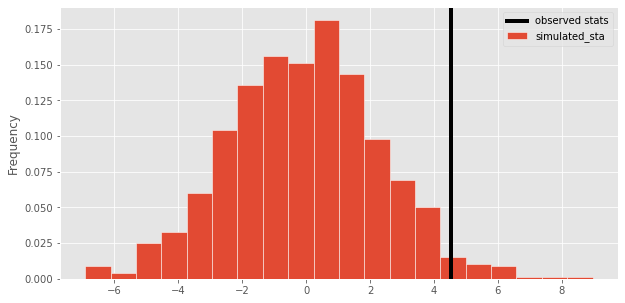

In [95]:
(bpd.DataFrame()
 .assign(simulated_sta=sim_stats)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(observed_handshake, color='black', linewidth=4, label='observed stats')
plt.legend();

In [96]:
sum(sim_stats >= observed_handshake)/1000

0.021

<a id='section5'></a>
## Section 5: Devilishly Difficult Challenges 😈

Contestants on the Great British Bake Off sometimes groan when the hosts announce that the upcoming Technical Challenge was chosen by judge Paul Hollywood. Paul has a reputation for posing exceptionally difficult challenges and most bakers believe that his recipes are much harder than those of his co-judges, Mary Berry and Prue Leith. We want to examine whether this theory is justified by the data. 

The `technical_challenge_recipes` DataFrame contains 83 Technical Challenge recipes from seasons 1 through 9. Each Technical Challenge is posed by one particular judge, and comes from their personal collection of recipes. In the first nine seasons, Mary posed 32 Technical Challenges, Paul posed 41, and Prue posed 10. The `technical_challenge_recipes` DataFrame includes a `'DifficultyScore'` for each recipe, with more challenging recipes having higher scores.

In [99]:
judge_difficulty = technical_challenge_recipes.groupby('Whose').mean()
mean_by_judge = judge_difficulty.assign(mean_difficulty_score = judge_difficulty.get('DifficultyScore')).get(['mean_difficulty_score'])
mean_by_judge

,mean_difficulty_score
Whose,
Mary,4.900000
Paul,4.702439
Prue,7.240000


notice that Mary and Paul both have an average difficulty of less than 5, whereas Prue has a mean difficulty greater than 7. Does it mean that Prue, in fact, is the devil when it comes to Technical Challenges? In other words, does Prue have a much more challenging recipe collection than the other judges? Or is this all by chance?

Suppose each judge has an extensive personal recipe collection with recipes of varying difficulty, and the Technical Challenges for each episode are drawn randomly from this collection. We want to estimate the average difficulty of all recipes in each judge's collection. Unfortunately, we don't have access to a judge's entire recipe collection, we only have access to the sample of recipes they've used for Technical Challenges in the Great British Bake Off. Thus, we will tackle this problem using **bootstrapping**. 


In [101]:
def simulate_estimates(sample_df, variable, repetitions):
    '''Returns an array of length repetitions, containing bootstrapped means of the variable from sample_df. '''
    resample_means = np.array([])
    for n in np.arange(repetitions):
        one_mean = sample_df.sample(sample_df.shape[0], replace=True).get(variable).mean()
        resample_means = np.append(resample_means, one_mean)
    return resample_means

In [103]:
mary_boot_means = simulate_estimates(
    technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Mary'], 'DifficultyScore', 5000)

paul_boot_means =  simulate_estimates(
    technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Paul'], 'DifficultyScore', 5000)

prue_boot_means = simulate_estimates(
    technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Prue'], 'DifficultyScore', 5000)




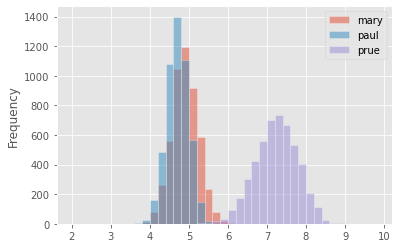

In [104]:
graph_df = bpd.DataFrame().assign(mary = mary_boot_means, paul = paul_boot_means, prue = prue_boot_means)
graph_df.plot(kind='hist', bins=np.arange(2,10,0.2), alpha=0.5, ec='w');

In [105]:
empty_df = bpd.DataFrame()
empty_df.assign(mary=mary_boot_means).assign(paul = paul_boot_means)

,mary,paul
0,4.93125,4.712195
1,4.91875,4.795122
2,4.79375,4.458537
3,4.41875,5.458537
4,4.28125,4.409756
...,...,...
4995,4.34375,4.190244
4996,4.72500,5.058537
4997,4.73125,4.609756
4998,5.20625,4.843902


In [107]:
def confidence_interval_95(boot_stats):
    '''Returns a list of the endpoints of a 95% confidence interval based on boot_stats.'''
    return [np.percentile(boot_stats, 2.5), np.percentile(boot_stats, 97.5)]

print("Mary 95% CI:", confidence_interval_95(mary_boot_means))
print("Paul 95% CI:", confidence_interval_95(paul_boot_means))
print("Prue 95% CI:", confidence_interval_95(prue_boot_means))

Mary 95% CI: [4.24375, 5.575]
Paul 95% CI: [4.151219512195122, 5.224390243902438]
Prue 95% CI: [6.159999999999999, 8.239999999999998]


From what we've done so far, it's clear that Prue's recipes have a very different difficulty level than the recipes of the other two judges. Now let's address a different question: how does the average difficulty of Paul's recipes compare to the average difficulty of Mary's recipes? 



In [113]:
 technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Mary']

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
5,2,1,Coffee and Walnut Battenburg,Mary,https://www.bbc.com/food/recipes/coffee_and_wa...,3,13,38,4,5.4
6,2,2,Tart au Citron,Mary,https://www.bbc.com/food/recipes/tarte_au_citr...,2,9,37,4,4.4
8,2,4,Brandy snaps,Mary,https://www.bbc.com/food/recipes/brandy_snaps_...,1,6,23,5,2.4
...,...,...,...,...,...,...,...,...,...,...
53,7,1,Jaffa cakes,Mary,https://thegreatbritishbakeoff.co.uk/marys-jaf...,3,8,16,5,3.4
54,7,2,Viennese Whirls,Mary,https://thegreatbritishbakeoff.co.uk/marys-vie...,3,7,19,4,3.4
57,7,5,Bakewell tart,Mary,https://thegreatbritishbakeoff.co.uk/marys-bak...,4,11,25,3,4.2
59,7,7,Marjolaine,Mary,https://thegreatbritishbakeoff.co.uk/marys-mar...,5,14,39,14,8.4


In [114]:
mary_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Mary']
paul_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Paul']
observed_diff_mean = mary_only.get('DifficultyScore').mean() - paul_only.get('DifficultyScore').mean()
observed_diff_mean

0.19756097560975672

So there is definitely a difference in mean difficulty scores between Mary's and Paul's Technical Challenge recipes, within our sample of recipes that have appeared as Technical Challenges in the show. But does this reflect a difference in mean recipe difficulty scores in the population (the judges' recipe collections), or was it by chance that our sample's difficulty displayed this difference? Let's do a hypothesis test to find out. We'll state our hypotheses as follows:

- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.



In [ ]:
np.random.seed(57) 

difference_means = np.array([])
for n in np.arange(1000):
    mary_diffi = mary_only.sample(mary_only.shape[0], replace=True).get('DifficultyScore').mean()
    paul_diffi = paul_only.sample(paul_only.shape[0], replace=True).get('DifficultyScore').mean()
    difference_means = np.append(difference_means, mary_diffi - paul_diffi)

# Just display the first ten differences.
difference_means[:10]

array([ 0.66463415,  0.20685976,  0.53033537,  0.17957317,  0.92987805,
        0.04588415,  0.26112805,  0.79817073,  0.31417683, -0.18887195])

Let's visualize estimates:

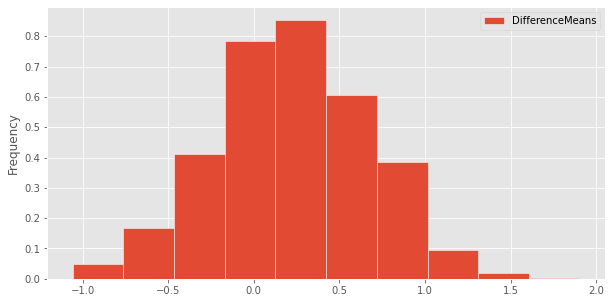

In [118]:
(bpd.DataFrame().assign(DifferenceMeans = difference_means)
 .plot(kind='hist', density=True, ec='w', figsize=(10, 5)));

In [119]:
mary_paul_difference_CI = confidence_interval_95(difference_means)
mary_paul_difference_CI

[-0.6518102134146331, 1.075571646341464]

Recall the hypotheses we were testing:
- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.


In [121]:
reject_null_mary_paul = False
reject_null_mary_paul

False

We have now uncovered some interesting facts about the difficulty levels of the different judges' recipe collections. However, we also want to know whether the judges' recipe collections have other differences. For example, do certain judges have recipes with more ingredients, more components, or longer instructions?

To do this, we want to generalize our simulation code so that we can create a confidence interval for any variable.


In [123]:
prue_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose')=='Prue']

Mary's 95% CI for Dishes :  [5.125, 7.03125]
Paul's 95% CI for Dishes :  [5.853048780487804, 7.658536585365853]
Prue's 95% CI for Dishes :  [8.1, 13.2]


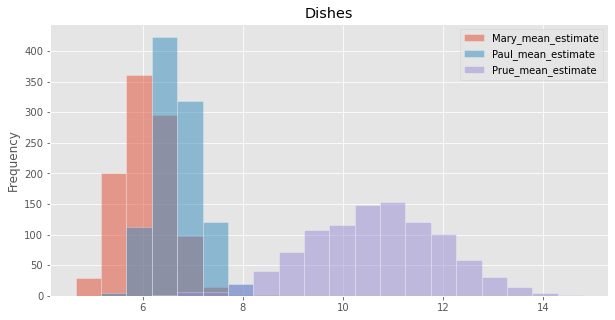

In [124]:
def bootstrap_estimation(sample_df, judges, variable, repetitions):
    '''Generates a histogram and for each judge, a confidence interval for the mean value of the variable from sample_df.'''
    comparison_df = bpd.DataFrame()
    mary_boot_means = simulate_estimates(mary_only, variable, repetitions)
    paul_boot_means = simulate_estimates(paul_only, variable, repetitions)
    prue_boot_means = simulate_estimates(prue_only, variable, repetitions)
    
    for judge in judges:
        if judge == 'Mary':
            comparison_df = comparison_df.assign(Mary_mean_estimate = mary_boot_means)
        elif judge == 'Paul':
            comparison_df = comparison_df.assign(Paul_mean_estimate = paul_boot_means)
        else:
            comparison_df = comparison_df.assign(Prue_mean_estimate = prue_boot_means)
        
    print("Mary's 95% CI for", variable, ': ', confidence_interval_95(mary_boot_means))
    print("Paul's 95% CI for", variable, ': ', confidence_interval_95(paul_boot_means))
    print("Prue's 95% CI for", variable, ': ', confidence_interval_95(prue_boot_means))

    comparison_df.plot(kind='hist', bins=20, alpha=0.5, figsize=(10,5), ec='w', title=variable);
    
    
    
# Try to replicate the graph shown in the example.
bootstrap_estimation(technical_challenge_recipes, ['Mary', 'Paul', 'Prue'], 'Dishes', 1000)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_12
manual: True
points: 2

-->

Mary's 95% CI for RecipeSentences :  [27.5625, 37.875]
Paul's 95% CI for RecipeSentences :  [24.75609756097561, 31.829878048780486]
Prue's 95% CI for RecipeSentences :  [28.7, 44.302499999999995]


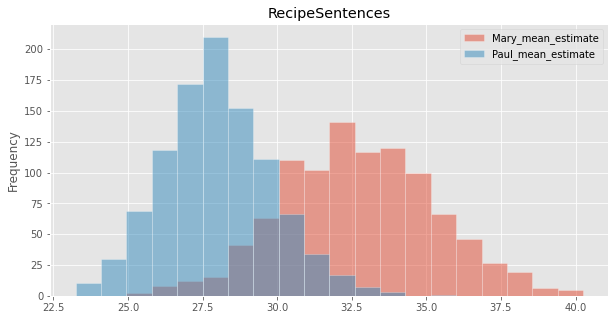

In [126]:

bootstrap_estimation(technical_challenge_recipes, ['Mary', 'Paul'], 'RecipeSentences', 1000)

<!-- END QUESTION -->

Mary's 95% CI for IngredCount :  [9.21875, 11.1875]
Paul's 95% CI for IngredCount :  [9.510975609756096, 12.585365853658537]
Prue's 95% CI for IngredCount :  [12.7, 15.9]


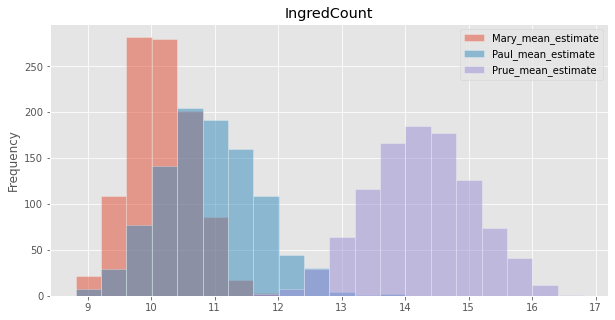

In [127]:

bootstrap_estimation(technical_challenge_recipes, ['Mary', 'Paul', 'Prue'], 'IngredCount', 1000)

<a id='section6'></a>
## Section 6: Piece of Cake? 🍰

In this section of the project, we'll focus on probability.

You wonder how frequently winners are recognized with the special designation of Star Baker ⭐. If we randomly select a winner from the first ten seasons of the show, what is the probability that they won Star Baker ⭐ at some point?

In [131]:
p_star_given_win = 9/10
p_star_given_win

0.9

Notice that in both of the previous questions, we calculated a conditional probability. Among bakers who satisfy one condition (winning), what is the probability they satisfy another condition (placing first in a technical, or earning Star Baker ⭐). Let's generalize the code for these calculations so that we can more easily compute conditional probabilities with other conditions.


In [133]:
def conditional_probability(find, given):
    '''Returns the conditional probability of an event given a known condition.'''
    given_bakers = bakers[bakers.get(given[0]) == given[1]]
    find_bakers = given_bakers[given_bakers.get(find[0])==find[1]]
    return find_bakers.shape[0] / given_bakers.shape[0]
    
conditional_probability(['star_baker', 1], ['series_winner', 1])

0.9

Now use the function `conditional_probability` to calculate the following probabilities:
- `p_female_given_young`: The probability that a randomly chosen young contestant is female. 👧🏽
- `p_female_given_elderly`: The probability that a randomly chosen elderly contestant is female. 👵

In [135]:
p_female_given_young = conditional_probability(['gender', 'F'], ['age_category', 'Young'])
p_female_given_elderly = conditional_probability(['gender', 'F'], ['age_category', 'Elderly'])

print(f'''P(female given young) = {p_female_given_young}
P(female given elderly) = {p_female_given_elderly}''')

P(female given young) = 0.4675324675324675
P(female given elderly) = 0.75


Suppose the producers of the show want to do a special episode bringing back past contestants, as they often do for the holidays 🎄🕎. They decide to choose one contestant at random from each of the first ten seasons. What is the probability that there is at least one winner selected?

In [137]:
prob = 1
for n in np.arange(1, 11):
    prob = conditional_probability(['series_winner', 0], ['series', n]) * prob
prob

0.41705983847660527

In [138]:
p_include_winner = 1 - prob
p_include_winner

0.5829401615233947

You have dreams 💭 of being on the bake off yourself, and to practice, you decide to bake 10 Technical Challenge recipes, chosen at random **with replacement** from the `technical_challenge_recipes` DataFrame. What is the probability that all 10 of them have a `'DifficultyScore'` greater than 5?

In [140]:
p_all_above_5 = (technical_challenge_recipes[technical_challenge_recipes.get('DifficultyScore')>5].shape[0]/83) ** 10
p_all_above_5

0.0005246445267175485

<a id='section7'></a>
## Section 7: Recipe Name Generator 👩‍🍳🖨️

After seeing the creative bakes featured in the Signature and Showstopper Challenges, you're feeling inspired to invent some new recipes yourself. 

All of your recipe titles will consist words chosen randomly from a limited set of options. There are **three categories of words**:
1. *Ingredients* 
    - For example, "Chocolate", "Pumpkin", and "Mint".
    
2. *Items* 
    - For example, "Cupcakes", "Croissants", and "Biscuits".
    
3. *Extras* 
    - For example, "Meringue", "Swirl", and "Ganache".

To generate a recipe title, you'll first randomly select a template for your recipe title. There are **four recipe templates**:
1. *Ingredient Ingredient Item with Ingredient Extra* 
    - For example, "Chocolate Mint Cupcakes with Pumpkin Swirl".
2. *Item with Ingredient Extra*  
    - For example "Croissants with Mint Ganache".
3. *Ingredient, Ingredient, and Ingredient Item* 
    - For example, "Mint, Chocolate, and Pumpkin Biscuits".
4. *Ingredient Ingredient Item* 
    - For example, "Pumpkin Chocolate Croissants".

Once you have determined the template, you will randomly select *Ingredients*, *Items*, and *Extras* in the appropriate quantities. Each category of words has an associated probability distribution that describes the likelihood of each word in the category being chosen. 


In [146]:
ingredient_df = bpd.read_csv('data/ingredients.csv')
ingredient_df

,ingredients,probabilities
0,Chocolate,0.1
1,Blueberry,0.1
2,Lemon,0.1
3,Orange,0.1
4,Ginger,0.1
5,Pumpkin,0.1
6,Strawberry,0.1
7,Blackberry,0.1
8,Mint,0.1
9,Carrot,0.1


In [147]:
item_df = bpd.read_csv('data/items.csv')
item_df

,items,probabilities
0,Cupcakes,0.12
1,Croissants,0.08
2,Cake,0.02
3,Mousse,0.04
4,Pastries,0.22
...,...,...
8,Traybake,0.03
9,Tart,0.11
10,Roulade,0.08
11,Biscuits,0.05


In [148]:
extra_df = bpd.read_csv('data/extras.csv')
extra_df

,extras,probabilities
0,Icing,0.29
1,Buttercream,0.02
2,Meringue,0.09
3,Puree,0.10
4,Sauce,0.11
...,...,...
6,Stuffing,0.02
7,Topping,0.14
8,Swirl,0.01
9,Ganache,0.15


In [150]:


def one_recipe():
    template = np.random.choice([1, 2, 3, 4])
    
    ingredients_all = np.array(ingredient_df.get('ingredients'))
    ingredients_list = np.random.choice(ingredients_all, 3, replace=False)
    
    items_all = np.array(item_df.get('items'))
    items_prob = np.array(item_df.get('probabilities'))
    item = np.random.choice(items_all, p=items_prob)
    
    extras_all = np.array(extra_df.get('extras'))
    extras_prob = np.array(extra_df.get('probabilities'))
    extra = np.random.choice(extras_all, p=extras_prob)

    if template == 1:
        return ingredients_list[0] + ' ' + ingredients_list[1] + ' ' + item + ' with ' + ingredients_list[2] + ' ' + extra
    elif template == 2:
        return item + ' with ' + ingredients_list[0] + ' ' + extra
    elif template == 3:
        return ingredients_list[0] + ', ' + ingredients_list[1] + ', and ' + ingredients_list[2] + ' ' + item
    else:
        return ingredients_list[0] + ' ' + ingredients_list[1] + ' ' + item
        
one_recipe()

'Blueberry, Mint, and Orange Pastries'

In [153]:
recipe_titles = np.array([])
for n in np.arange(10000):
    recipe_titles = np.append(recipe_titles, one_recipe())
recipe_titles

array(['Blackberry Lemon Pudding',
       'Lemon, Carrot, and Blackberry Pudding',
       'Pastries with Pumpkin Ganache', ..., 'Strawberry Lemon Mousse',
       'Chocolate, Orange, and Ginger Pudding',
       'Strawberry, Blackberry, and Pumpkin Buns'], dtype='<U55')

In [155]:
num_cho = 0 
for recipe in recipe_titles:
    if 'Chocolate' in recipe:
        num_cho += 1

In [156]:
prob_chocolate = num_cho / 10000
prob_chocolate

0.2228

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q7_5
points: 1
manual: True
-->

<!-- END QUESTION -->



<a id='section8'></a>
## Section 8: Dishwashing 🧼🍽️

In this section, we will explore whether the difficulty of a recipe is correlated with the number of dirty dishes it produces. Regression is helpful when we want to use one numerical value to predict another numerical value.

Let's start by visualizing the data with a scatter plot to see if linear regression would make sense for this dataset.

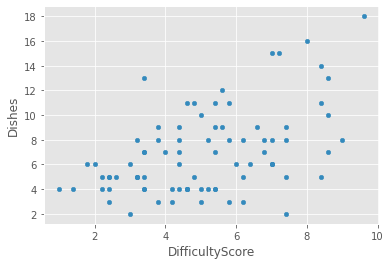

In [162]:
technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes');

Based on the scatter plot, it seems like linear regression would be an appropriate tool. Let's proceed!

In [163]:
def standard_units(sequence):
    '''Returns the input sequence as an array in standard units.'''
    # Convert the input to an array, if it is not already.
    sequence = np.array(sequence)
    return (sequence - np.nanmean(sequence)) / np.nanstd(sequence)

difficulty_standard = standard_units(technical_challenge_recipes.get('DifficultyScore'))
dishes_standard = standard_units(technical_challenge_recipes.get('Dishes'))

In [165]:
def correlation(df, independent, dependent):
    '''Returns the correlation between the independent and dependent variables in the given DataFrame.'''
    return np.nanmean(standard_units(df.get(independent)) * standard_units(df.get(dependent)))

corr = correlation(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
corr

0.4945693747864214

In [167]:
def reg_slope(df, independent, dependent):
    '''Returns the slope of the regression line in original units.'''
    r = np.nanmean(standard_units(df.get(independent)) * standard_units(df.get(dependent)))
    return r * np.nanstd(df.get(dependent)) / np.nanstd(df.get(independent))

def reg_intercept(df, independent, dependent):
    '''Return the intercept of the regression line in original units.'''
    return np.nanmean(df.get(dependent)) - reg_slope(df, independent, dependent) * np.nanmean(df.get(independent))

slope = reg_slope(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
intercept = reg_intercept(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
slope, intercept

(0.8421920391715867, 2.6336742104769924)

In [169]:
technical_challenge_recipes.get('DifficultyScore') * slope + intercept

0      5.328689
1      4.149620
2      7.349950
3      7.013073
4      5.497127
        ...    
78     8.529018
79     9.708087
80     8.697457
81    10.718718
82     9.876526
Name: DifficultyScore, Length: 83, dtype: float64

In [170]:
def predict(df, independent, dependent):
    '''Returns an array of predicted values of the dependent variable calculated from the regression line.'''
    return np.array(df.get(independent) * reg_slope(df, independent, dependent) 
                    + reg_intercept(df, independent, dependent))

predicted_dishes = predict(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
predicted_dishes

array([ 5.32868874,  4.14961988,  7.34994963,  7.01307281,  5.49712714,
        7.18151122,  6.33931918,  3.47586625,  4.6549351 ,  7.68682645,
        4.82337351,  6.17088077,  6.33931918,  7.01307281,  4.6549351 ,
        4.6549351 ,  5.16025033,  7.18151122,  5.16025033,  5.83400396,
        6.84463441,  8.52901848,  8.02370326,  6.84463441,  3.81274307,
        6.33931918,  5.32868874,  6.33931918,  6.50775759,  6.84463441,
        7.85526485,  9.87652575,  7.18151122,  4.4864967 ,  5.49712714,
        4.31805829,  6.676196  ,  6.50775759,  9.70808734,  6.00244237,
        8.36058008,  7.85526485,  8.52901848,  8.8658953 ,  6.50775759,
        4.6549351 ,  8.36058008,  7.18151122,  8.52901848,  8.8658953 ,
        8.8658953 ,  5.49712714,  8.8658953 ,  5.49712714,  5.49712714,
        7.51838804,  5.49712714,  6.17088077,  6.676196  ,  9.70808734,
        4.4864967 ,  8.52901848,  5.32868874,  8.19214167,  6.33931918,
        6.50775759,  7.34994963,  5.32868874,  7.18151122,  5.83

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q8_5
points: 1
manual: True
-->

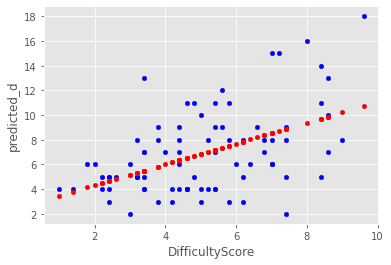

In [172]:
ax1 = technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes', color='b')
(technical_challenge_recipes.assign(predicted_d = predicted_dishes)
     .plot(kind='scatter', x='DifficultyScore', y='predicted_d', color='r', ax=ax1));


Now that we have general code to calculate the regression line between any pair of variables in any DataFrame, let's generalize our code for the overlaid scatter plot so we can visualize relationships between other pairs of variables.

'The correlation between DifficultyScore and Dishes is 0.49.  The slope of the regression line is 0.84. The intercept of the regression line is 2.63.'

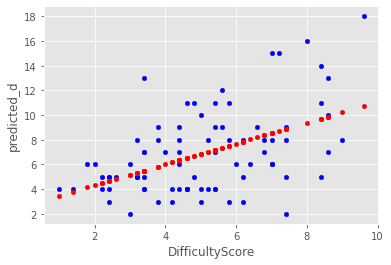

In [175]:
def display_predictions(df, independent, dependent):
    '''Generates an overlaid scatter plot showing the relationship between the independent and dependent variables in df.
    Returns a string describing the correlation and the slope and intercept of the regression line.'''
    # Create overlaid scatter plot.
    ax1 = df.plot(kind='scatter', x=independent, y=dependent, color='b')
    (df.assign(predicted_d = predict(df, independent, dependent))
         .plot(kind='scatter', x=independent, y='predicted_d', color='r', ax=ax1))

    
    return ("The correlation between {0} and {1} is {2}. " +\
           " The slope of the regression line is {3}." + \
           " The intercept of the regression line is {4}.")\
                .format(independent, 
                        dependent, 
                        str(round(correlation(df, independent, dependent), 2)),
                        str(round(reg_slope(df, independent, dependent), 2)), 
                        str(round(reg_intercept(df, independent, dependent), 2)))


display_predictions(technical_challenge_recipes, 'DifficultyScore', 'Dishes')

'The correlation between RecipeSentences and IngredCount is 0.57.  The slope of the regression line is 0.19. The intercept of the regression line is 5.28.'

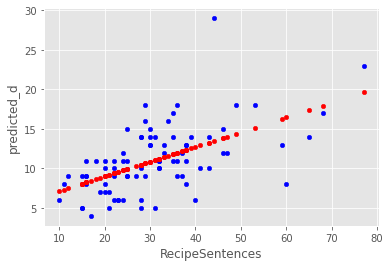

In [177]:
sentences_ingredients = display_predictions(technical_challenge_recipes, 'RecipeSentences', 'IngredCount')
sentences_ingredients

'The correlation between IngredCount and DifficultyScore is 0.76.  The slope of the regression line is 0.36. The intercept of the regression line is 1.15.'

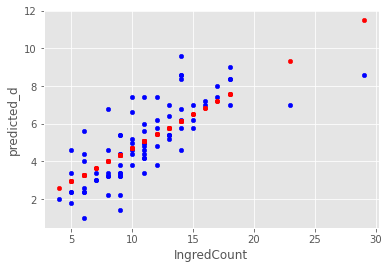

In [179]:
ingredients_diff = display_predictions(technical_challenge_recipes, 'IngredCount', 'DifficultyScore')
ingredients_diff

## Finish Line 🏁

<a id='sources'></a>
## Data Sources 📖

Our data and some of the inspiration for this project came from the following sources. 

- Hill A, Ismay C, Iannone R (2022). bakeoff: Data from "The Great British Bake Off". https://bakeoff.netlify.app/, https://github.com/apreshill/bakeoff.

- Davis, Erin (2019). Are Great British Bake Off Technical Challenges getting harder? https://erdavis.com/2019/06/08/are-great-british-bake-off-technical-challenges-getting-harder/, https://gist.github.com/erdavis1/09fd4a3aa424c5425a88d47f572ec20a.

- Ahamed, Nick (2019). Analyzing the Great British Bake Off. https://medium.com/analytics-vidhya/analyzing-the-great-british-bake-off-part-1-ffcdf3791bf3, https://medium.com/@nickahamed/analyzing-the-great-british-bake-off-part-2-1695ff95a0c9, https://docs.google.com/spreadsheets/d/1cvouOik_01QqtFQSq78xODIjcZZ8A-02VXa6IBvdG3I/edit#gid=0.